SVD:

- A = U * S * V^T
- A: n x p matrix
- U: n x n orthogonal matrix (left singular vectors)
- S: n x p diagonal matrix (singular values)
- V: p x p orthogonal matrix (right singular vectors)
- rotation * stretch  * rotation

- Au = lambda * u (u is an eigenvector of A)
- A - lambda * I = 0 (I is the identity matrix)

You have a matrix of numbers.  


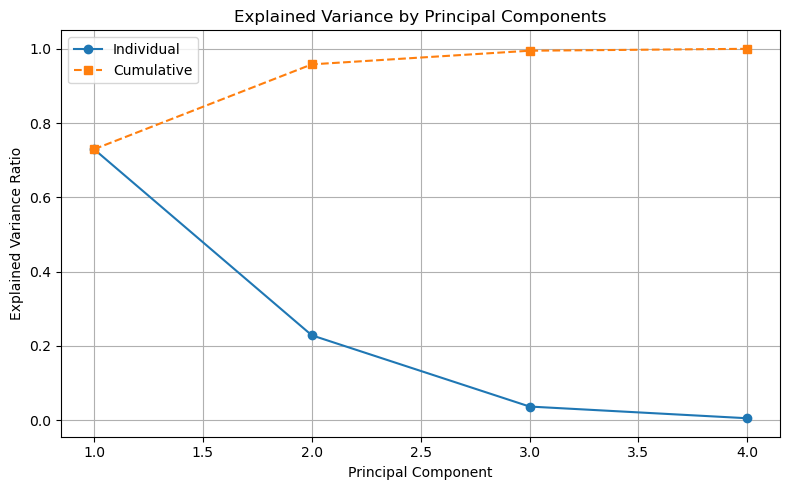

Principal Components (directions):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
PC1           0.521066         -0.269347           0.580413          0.564857
PC2           0.377418          0.923296           0.024492          0.066942
PC3           0.719566         -0.244382          -0.142126         -0.634273
PC4          -0.261286          0.123510           0.801449         -0.523597


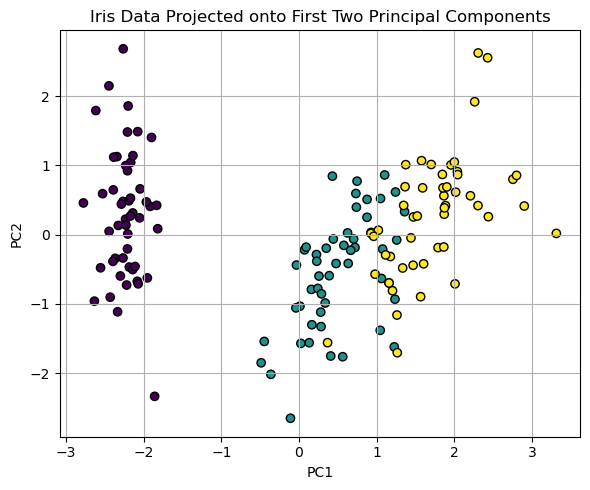

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# keep all the compoenents
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# explained variance
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

#  Principal components (eigenvectors / directions)
components = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(4)])

plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), explained_var, marker='o', label='Individual')
plt.plot(range(1, 5), cum_explained_var, marker='s', linestyle='--', label='Cumulative')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Principal Components (directions):")
print(components)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris Data Projected onto First Two Principal Components')
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd

# Original dataset Height (cm), Weight (kg), BMI
X = np.array([
    [170, 70, 24.22],
    [160, 60, 23.44],
    [180, 80, 24.69],
    [175, 72, 23.51],
    [165, 65, 23.88]
])
#  Center (subtract mean of each column)
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

print("Mean:", X_mean)
print("Centered Data:\n", X_centered)


Mean: [170.     69.4    23.948]
Centered Data:
 [[  0.      0.6     0.272]
 [-10.     -9.4    -0.508]
 [ 10.     10.6     0.742]
 [  5.      2.6    -0.438]
 [ -5.     -4.4    -0.068]]


In [3]:
type(X_centered)

numpy.ndarray

In [4]:
X.shape

(5, 3)

In [5]:
n_samples, n_features = X_centered.shape

In [7]:
cov_matrix = (X_centered.T @ X_centered) / (n_samples - 1)


In [8]:
cov_matrix

array([[62.5    , 58.75   ,  2.6625 ],
       [58.75   , 56.8    ,  2.991  ],
       [ 2.6625 ,  2.991  ,  0.26977]])

In [9]:
U, S, VT = np.linalg.svd(X_centered, full_matrices=False)


In [10]:
S

array([21.78106325,  1.96141252,  0.13124191])

In [11]:
U

array([[-0.01941281,  0.25438337,  0.6021596 ],
       [ 0.63052203,  0.03554759, -0.58142247],
       [-0.66886793,  0.41482052, -0.40770736],
       [-0.24771852, -0.85913608,  0.02281956],
       [ 0.30547723,  0.15438461,  0.36415067]])

In [12]:
VT

array([[-0.72355873, -0.68943938, -0.03370622],
       [-0.64997759,  0.66407961,  0.36949615],
       [ 0.23236159, -0.28926045,  0.92862074]])

In [13]:

explained_variance = (S ** 2) / (n_samples - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

print("Explained Variance:", explained_variance)
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance: [1.18603679e+02 9.61784766e-01 4.30610947e-03]
Explained Variance Ratio: [9.91920275e-01 8.04371177e-03 3.60133625e-05]


In [14]:
X_pca = X_centered @ VT.T

print("Projected Data (PCA scores):\n", X_pca)

Projected Data (PCA scores):
 [[-4.22831720e-01  4.98950720e-01  7.90285737e-02]
 [ 1.37334402e+01  6.97234825e-02 -7.63069929e-02]
 [-1.45686547e+01  8.13634151e-01 -5.35082904e-02]
 [-5.39557270e+00 -1.68512026e+00  2.99488211e-03]
 [ 6.65361893e+00  3.02811909e-01  4.77918276e-02]]
